In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
%matplotlib inline
import re


import plotly as py
import cufflinks as cf
import plotly.express as px
%matplotlib inline

# Make Plotly work in your Jupyter Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()


import matplotlib as mpl
from matplotlib.ticker import FuncFormatter

import calendar
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.offline as offline
import plotly.graph_objs as go
#offline.init_notebook_mode(connected = True)


import dash
from dash import dcc, html
from sklearn.cluster import KMeans
from scipy import stats

import warnings
warnings.filterwarnings('ignore')


In [42]:
df = pd.read_csv('filtered_data.csv')

In [43]:
# df.head()

In [44]:
# Selecting a random sample of 10000 rows
#df = df.sample(n=10000, random_state=42)

In [45]:
# df.to_csv('samplerecord.csv')

In [46]:
# df.info()

In [47]:
# Summary statistics for numerical variables
# df.describe().T

In [48]:
# Summary statistics for categorical variables
# df.describe(include='object').T

In [49]:
# df.shape

## Data cleaning and transformation

This step encompasses a comprehensive cleaning and transformation process to refine the dataset. It includes addressing missing values, eliminating duplicate entries, correcting anomalies in product codes and descriptions, and other necessary adjustments to prepare the data for in-depth analysis and modeling.

In [50]:
'''
Function returns dataframe of column name and their unique value list.
Parameters to passed dataframe and number of count which will limit the count of number of unique value in column.
'''

def get_unique(df,ncount):
    # Create a DataFrame to store unique values
    unique_values_df = pd.DataFrame(columns=['Column Name', 'Unique Values' ])
    
    # Iterate over columns add check unique values
    for col in df.columns:
        unique_values = df[col].unique()
        
        # Append to DataFrame if the number of unique values is less than count given
        if len(unique_values) <= ncount:
            unique_values_df = unique_values_df.append({'Column Name': col, 'Unique Values': unique_values}, 
                                                       ignore_index=True)
    return unique_values_df


'''
Function to get missing values count and duplicate entry count.
Accepts dataframe as parameter
'''

def summary_table(df):

    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    return summary.sort_values(by='Uniques')


'''
Function to get basic EDA.
Accepts dataframe as parameter
'''

def basic_EDA(df):
    size = df.shape
    sum_duplicates = df.duplicated().sum()
    sum_null = df.isnull().sum().sum()
    is_NaN = df. isnull()
    row_has_NaN = is_NaN. any(axis=1)
    rows_with_NaN = df[row_has_NaN]
    count_NaN_rows = rows_with_NaN.shape
    return print("Number of Samples: %d\nNumber of Features: %d\nDuplicated Entries: %d\nNull Entries: %d\nNumber of Rows with Null Entries: %d %.1f%%" %(size[0],size[1], sum_duplicates, sum_null,count_NaN_rows[0],(count_NaN_rows[0] / df.shape[0])*100))

In [51]:
#basic_EDA(df)

In [52]:
#summary_table(df)

In [53]:
# uniquedf = get_unique(df,40)

In [54]:
# uniquedf

In [55]:
# df['event_type'].value_counts()

- Dropping Null Values as mostly we have null values in Customer Id and we need that information.
- There are duplicate entry as well so will be dropping them also.

In [56]:
# df.dropna(inplace=True)

In [57]:
# df.drop_duplicates(inplace=True)

In [58]:
# basic_EDA(df)

In [59]:
# df.head()

In [60]:
df['date'] = df['event_time'].apply(lambda x: x.split()[0])
df['date']=pd.to_datetime(df['date'],format='%Y-%m-%d')

In [61]:
df['user_purchase'] = df['event_type'].apply(lambda x: 1 if x=='purchase' else 0)

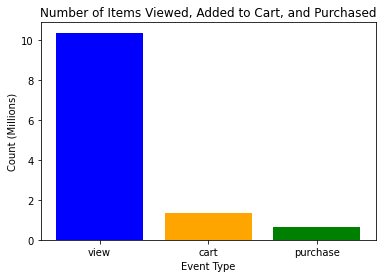

view        10373158
cart         1335679
purchase      625885
Name: event_type, dtype: int64


In [62]:
event_counts = df['event_type'].value_counts()
plt.bar(event_counts.index, event_counts.values, color=['blue', 'orange', 'green'])
plt.xlabel('Event Type')
plt.ylabel('Count (Millions)')
plt.title('Number of Items Viewed, Added to Cart, and Purchased')

# Format y-axis ticks to display in hundred thousands
formatter = FuncFormatter(lambda x, _: '{:,.0f}'.format(x/1000000))
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

print(event_counts)

In [63]:
# Updated based on above analysis

df['event_weightage'] = df['event_type'].map({'view':1,'cart':8,'purchase':16})

In [64]:
df['product_category'] =df['category_code'].astype(str).str.split('.')

In [65]:
df['product_category'] = df['product_category'].apply(lambda x: x[0])

In [66]:
df['product_category'].value_counts()

electronics     7291507
appliances      2367129
computers       1084502
apparel          588212
auto             246416
furniture        230341
construction     221849
kids             154512
accessories       97193
sport             40608
medicine           6743
country_yard       3275
stationery         2435
Name: product_category, dtype: int64

In [67]:
# df.columns

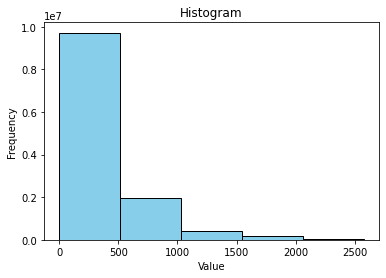

In [68]:
plt.hist(df['price'], bins=5, color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')

# Show plot
plt.show()

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12334722 entries, 0 to 12334721
Data columns (total 13 columns):
 #   Column            Dtype         
---  ------            -----         
 0   event_time        object        
 1   event_type        object        
 2   product_id        int64         
 3   category_id       int64         
 4   category_code     object        
 5   brand             object        
 6   price             float64       
 7   user_id           int64         
 8   user_session      object        
 9   date              datetime64[ns]
 10  user_purchase     int64         
 11  event_weightage   int64         
 12  product_category  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(6)
memory usage: 1.2+ GB


categorical or object type - event_time, event_type,category_code,brand, user_session, date, product_category

converting event_type, brand,user_session, product_category to integers 

for now dropping remaining

# Customer Segmentation # 

In [70]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,date,user_purchase,event_weightage,product_category
0,2019-11-01 00:00:10 UTC,view,1307350,2053013558920217191,computers.notebook,acer,514.79,513741043,82f7f972-346a-41f1-ae58-3ccf1edf6726,2019-11-01,0,1,computers
1,2019-11-01 00:00:14 UTC,view,1002544,2053013555631882655,electronics.smartphone,apple,458.28,549256216,dcbdc6e4-cd49-4ee8-95c5-e85f3c618fa1,2019-11-01,0,1,electronics
2,2019-11-01 00:00:14 UTC,cart,1005014,2053013555631882655,electronics.smartphone,samsung,503.09,533326659,6b928be2-2bce-4640-8296-0efdf2fda22a,2019-11-01,0,8,electronics
3,2019-11-01 00:00:17 UTC,view,1005161,2053013555631882655,electronics.smartphone,xiaomi,211.92,513351129,e6b7ce9b-1938-4e20-976c-8b4163aea11d,2019-11-01,0,1,electronics
4,2019-11-01 00:00:28 UTC,view,4804295,2053013554658804075,electronics.audio.headphone,xiaomi,22.80,543653226,ab310b47-1eb2-45f8-8e5b-21ab2010925a,2019-11-01,0,1,electronics


In [71]:
# Assuming df contains your dataset with column 'event_type'

# Convert 'event_type' to categorical type to ensure proper ordering
df['event_type'] = pd.Categorical(df['event_type'], categories=['view', 'cart', 'purchase'], ordered=True)

# Calculate the counts of each event type for each user
user_activity = df.groupby('user_id')['event_type'].value_counts().unstack(fill_value=0)

# Calculate the ratio of views to cart to purchases
user_activity['CV_score'] = user_activity['cart'] / (user_activity['view']) * np.log10(user_activity['view'] + user_activity['cart'])
user_activity['PC_score'] = user_activity['purchase'] / (user_activity['cart']) * np.log10(user_activity['purchase'] + user_activity['cart'])


# View the resulting dataframe with the score
# print(user_activity[['view', 'cart', 'purchase', 'CV_ratio','VP_ratio', 'log_scale', 'CV_score', 'VP_score']])
user_activity.head(10)

,view,cart,purchase,CV_score,PC_score
user_id,,,,,
225644257,8,2,1,0.250000,0.238561
256164170,4,1,1,0.174743,0.301030
296197073,58,6,1,0.186846,0.140850
299358698,48,1,1,0.035212,0.301030
304707635,2,2,1,0.602060,0.238561
307138432,4,1,1,0.174743,0.301030
308228668,29,4,1,0.209450,0.174743
310402868,6,2,1,0.301030,0.238561
315835135,79,4,1,0.097169,0.174743


In [72]:

# Calculate z-scores for 'CV_score' and 'VP_score'
z_scores = stats.zscore(user_activity[['CV_score', 'PC_score']])

# Define a threshold for outlier detection
threshold = 3

# Filter out rows where any z-score exceeds the threshold
user_activity_no_outliers = user_activity[(np.abs(z_scores) < threshold).all(axis=1)]


In [73]:
n_clusters = 3
X_no_outliers = user_activity_no_outliers[['CV_score', 'PC_score']]
kmeans_no_outliers = KMeans(n_clusters=n_clusters, random_state=42)
user_activity_no_outliers['cluster'] = kmeans_no_outliers.fit_predict(X_no_outliers)

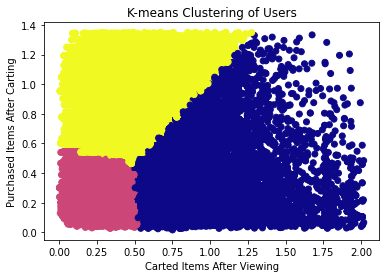

1    206533
2     54629
0     35173
Name: cluster, dtype: int64


In [74]:
# Visualize the clusters
plt.scatter(X_no_outliers['CV_score'], X_no_outliers['PC_score'], c=user_activity_no_outliers['cluster'], cmap='plasma')
plt.xlabel('Carted Items After Viewing')
plt.ylabel('Purchased Items After Carting')
plt.title('K-means Clustering of Users')

plt.show()

# View the distribution of users among clusters
print(user_activity_no_outliers['cluster'].value_counts())

In [75]:
# Identify the pink cluster
pink_cluster_index = user_activity_no_outliers['cluster'] == 0  # Assuming that pink cluster is labeled as '2'

# Separate points in the pink cluster with Y-axis value > 0.4
user_activity_no_outliers.loc[pink_cluster_index, 'sub_cluster'] = np.where(
    user_activity_no_outliers.loc[pink_cluster_index, 'PC_score'] > 0.4, 
    3,  # Assigning a new label for points with Y-axis value > 0.4
    user_activity_no_outliers.loc[pink_cluster_index, 'cluster']
)

# Update the 'cluster' column to include sub-clusters
user_activity_no_outliers['cluster'] = user_activity_no_outliers['sub_cluster'].fillna(user_activity_no_outliers['cluster']).astype(int)


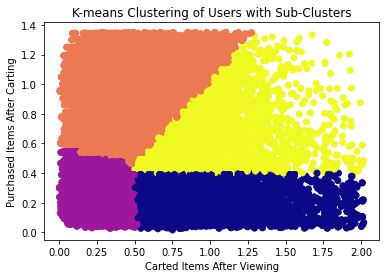

In [76]:

# Visualize the clusters including sub-clusters
plt.scatter(X_no_outliers['CV_score'], X_no_outliers['PC_score'], c=user_activity_no_outliers['cluster'], cmap='plasma')
plt.xlabel('Carted Items After Viewing')
plt.ylabel('Purchased Items After Carting')
plt.title('K-means Clustering of Users with Sub-Clusters')

plt.show()

In [77]:
# Merge the 'cluster' column from 'user_activity_no_outliers' to 'df_filtered'
df = df.merge(user_activity_no_outliers[['cluster']], how='left', on='user_id')

# Fill missing values in 'cluster' column with a default value (e.g., -1)
df['cluster'] = df['cluster'].fillna(-1).astype(int)
df.head(20)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,date,user_purchase,event_weightage,product_category,cluster
0,2019-11-01 00:00:10 UTC,view,1307350,2053013558920217191,computers.notebook,acer,514.79,513741043,82f7f972-346a-41f1-ae58-3ccf1edf6726,2019-11-01,0,1,computers,2
1,2019-11-01 00:00:14 UTC,view,1002544,2053013555631882655,electronics.smartphone,apple,458.28,549256216,dcbdc6e4-cd49-4ee8-95c5-e85f3c618fa1,2019-11-01,0,1,electronics,1
2,2019-11-01 00:00:14 UTC,cart,1005014,2053013555631882655,electronics.smartphone,samsung,503.09,533326659,6b928be2-2bce-4640-8296-0efdf2fda22a,2019-11-01,0,8,electronics,1
3,2019-11-01 00:00:17 UTC,view,1005161,2053013555631882655,electronics.smartphone,xiaomi,211.92,513351129,e6b7ce9b-1938-4e20-976c-8b4163aea11d,2019-11-01,0,1,electronics,1
4,2019-11-01 00:00:28 UTC,view,4804295,2053013554658804075,electronics.audio.headphone,xiaomi,22.80,543653226,ab310b47-1eb2-45f8-8e5b-21ab2010925a,2019-11-01,0,1,electronics,1
5,2019-11-01 00:00:35 UTC,view,2701305,2053013563911439225,appliances.kitchen.refrigerators,samsung,499.94,524356542,153f9818-4d32-4e8b-ba9f-f355094e8ae4,2019-11-01,0,1,appliances,2
6,2019-11-01 00:01:01 UTC,view,4804295,2053013554658804075,electronics.audio.headphone,xiaomi,22.80,543653226,ab310b47-1eb2-45f8-8e5b-21ab2010925a,2019-11-01,0,1,electronics,1
7,2019-11-01 00:01:03 UTC,view,1005116,2053013555631882655,electronics.smartphone,apple,1013.86,544896141,80a43be5-1e98-44ec-b60e-5c107c51c839,2019-11-01,0,1,electronics,1
8,2019-11-01 00:01:04 UTC,purchase,1005161,2053013555631882655,electronics.smartphone,xiaomi,211.92,513351129,e6b7ce9b-1938-4e20-976c-8b4163aea11d,2019-11-01,1,16,electronics,1
9,2019-11-01 00:01:26 UTC,view,1002528,2053013555631882655,electronics.smartphone,apple,617.52,549256216,dcbdc6e4-cd49-4ee8-95c5-e85f3c618fa1,2019-11-01,0,1,electronics,1


# Cluster EDA #

In [78]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,date,user_purchase,event_weightage,product_category,cluster
0,2019-11-01 00:00:10 UTC,view,1307350,2053013558920217191,computers.notebook,acer,514.79,513741043,82f7f972-346a-41f1-ae58-3ccf1edf6726,2019-11-01,0,1,computers,2
1,2019-11-01 00:00:14 UTC,view,1002544,2053013555631882655,electronics.smartphone,apple,458.28,549256216,dcbdc6e4-cd49-4ee8-95c5-e85f3c618fa1,2019-11-01,0,1,electronics,1
2,2019-11-01 00:00:14 UTC,cart,1005014,2053013555631882655,electronics.smartphone,samsung,503.09,533326659,6b928be2-2bce-4640-8296-0efdf2fda22a,2019-11-01,0,8,electronics,1
3,2019-11-01 00:00:17 UTC,view,1005161,2053013555631882655,electronics.smartphone,xiaomi,211.92,513351129,e6b7ce9b-1938-4e20-976c-8b4163aea11d,2019-11-01,0,1,electronics,1
4,2019-11-01 00:00:28 UTC,view,4804295,2053013554658804075,electronics.audio.headphone,xiaomi,22.80,543653226,ab310b47-1eb2-45f8-8e5b-21ab2010925a,2019-11-01,0,1,electronics,1


In [79]:
# Calculate the number of purchases made by each user in each cluster
purchase_counts = df[df['event_type'] == 'purchase'].groupby(['cluster', 'user_id']).size()
# --------------------------
# Calculate the average number of purchases per user in each cluster
average_purchases_per_user = purchase_counts.groupby('cluster').mean()
# --------------------------
total_purchase_price_per_user = df[df['event_type'] == 'purchase'].groupby(['cluster', 'user_id'])['price'].sum()
# Calculate the average total purchase price per user in each cluster
average_total_purchase_price_per_user = total_purchase_price_per_user.groupby('cluster').mean()
# --------------------------
# Calculate the percentage of users in each cluster compared to the overall count
user_counts = df.groupby('cluster')['user_id'].nunique()
cluster_percentages = user_counts / user_counts.sum()
# --------------------------
total_revenue = df['price'].sum()
# Group by cluster and calculate revenue for each cluster
cluster_revenue = df.groupby('cluster')['price'].sum()
# Calculate percentage of revenue contributed by each cluster
cluster_revenue_percentage = (cluster_revenue / total_revenue) * 100
# --------------------------
df['event_type'] = pd.Categorical(df['event_type'], categories=['view', 'cart', 'purchase'], ordered=True)
# Calculate the counts of each event type for each cluster
cluster_activity = df.groupby(['cluster', 'user_id'])['event_type'].value_counts().unstack(fill_value=0)
# Calculate total views and purchases for each cluster
total_views_per_cluster = cluster_activity.groupby('cluster')['view'].sum()
total_purchases_per_cluster = cluster_activity.groupby('cluster')['purchase'].sum()
# Calculate conversion rate for each cluster
conversion_rate_per_cluster = total_purchases_per_cluster / total_views_per_cluster
# --------------------------


# Combine the results into a DataFrame
cluster_analysis = pd.DataFrame({
    'Average Purchases per User': average_purchases_per_user,
    'Average Total Purchase Price per User': average_total_purchase_price_per_user,
    'Percentage of Users': cluster_percentages,
    'Percentage of Revenue': cluster_revenue_percentage,
    'Conversion Rate': conversion_rate_per_cluster,
})

# Display the results
print(cluster_analysis)

         Average Purchases per User  Average Total Purchase Price per User  \
cluster                                                                      
-1                         9.784467                            4204.563926   
 0                         1.584653                             572.964571   
 1                         1.231440                             410.375985   
 2                         4.073935                            1573.787252   
 3                         5.475475                            2208.669696   

         Percentage of Users  Percentage of Revenue  Conversion Rate  
cluster                                                               
-1                  0.019888               3.897090         0.226312  
 0                  0.087069               5.330325         0.108200  
 1                  0.683097              66.257386         0.033537  
 2                  0.180683              21.239691         0.114058  
 3                  0.02926

In [80]:
#conversion_rate_per_cluster.loc[0] = 0.0705175602633399

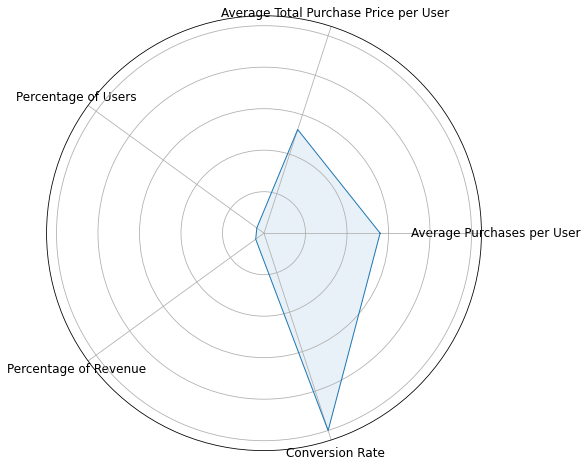

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style 

plt.style.use('fast')

# Define the features
features = ['Average Purchases per User', 'Average Total Purchase Price per User', 
            'Percentage of Users', 'Percentage of Revenue', 'Conversion Rate']

# Calculate the maximum value among all clusters for each feature
max_values = cluster_analysis[features].max()

# Create radar chart for the selected cluster
selected_cluster = 3  # Change this to the desired cluster number
if selected_cluster in cluster_analysis.index:
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    values_cluster = cluster_analysis.loc[selected_cluster, features]
    
    # Scale values based on maximum values
    values_cluster_scaled = values_cluster / max_values
    
    angles = np.linspace(0, 2 * np.pi, len(features), endpoint=False).tolist()
    values_cluster_scaled = np.concatenate((values_cluster_scaled, [values_cluster_scaled[0]]))  # Closing the loop
    angles += angles[:1]  # Closing the loop
    ax.plot(angles, values_cluster_scaled, linewidth=1, linestyle='solid', label=f'Cluster {selected_cluster}')
    ax.fill(angles, values_cluster_scaled, alpha=0.1)
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(features, fontsize=12)
    plt.show()
else:
    print(f"Cluster {selected_cluster} does not exist in the data.")


In [ ]:
cluster_analysis

In [83]:
df.to_csv('filterwithcluster.csv')

### Popularity based Recommendation System

In [33]:
def top_product_by_value_count(df):

    # Calculate popularity of each category
    category_popularity = df['product_category'].value_counts().reset_index()
    category_popularity.columns = ['product_category', 'popularity']

    # Select top 5 categories
    top_5_categories = category_popularity.nlargest(5, 'popularity')['product_category']

    # Filter data for top 5 categories
    df_top_5_categories = df[df['product_category'].isin(top_5_categories)]

    # Calculate popularity of each product within top 5 categories
    popularity = df_top_5_categories.groupby(['product_category', 'product_id']).size().reset_index(name='popularity_by_value_count')

    # Sort products by popularity within each category
    popularity_sorted = popularity.sort_values(by=['product_category', 'popularity_by_value_count'], ascending=[True, False])

    # Select top 10 popular products in each category
    top_10_popular = popularity_sorted.groupby('product_category').head(2)
    
    return top_10_popular

In [34]:
top_product_comparison = top_product_by_value_count(df)

In [35]:
top_product_comparison

,product_category,product_id,popularity_by_value_count
2913,apparel,28716666,4556
1847,apparel,28713229,2916
16079,appliances,3600661,29293
16722,appliances,3700926,20950
23689,auto,6000094,15492
23752,auto,6000227,8287
25026,computers,1307310,18286
24829,computers,1307073,16420
31815,electronics,1004856,263102
32009,electronics,1005115,239616


In [36]:
def top_product_by_category(df):
    # Calculate the sum of event_weightage for each category
    category_sum = df.groupby('product_category')['event_weightage'].sum().reset_index()

    # Select the top 5 categories based on the sum of event_weightage
    top_5_categories = category_sum.nlargest(5, 'event_weightage')['product_category']

    # Filter data for top 5 categories
    df_top_5_categories = df[df['product_category'].isin(top_5_categories)]

    # Calculate popularity of each product within top 5 categories
    popularity = df_top_5_categories.groupby(['product_category', 'product_id'])['event_weightage'].sum().reset_index(name='popularity')

    # Sort products by popularity within each category
    popularity_sorted = popularity.sort_values(by=['product_category', 'popularity'], ascending=[True, False])

    # Select top 10 popular products in each category
    top_10_popular = popularity_sorted.groupby('product_category').head(5)

    return top_10_popular

In [37]:
top_product = top_product_by_category(df)

In [38]:
categories = top_product['product_category'].unique()
for category in categories:
    print("Top Trending Product in ",category)
    for product in top_product.loc[top_product['product_category']==category]['product_id']:
        print(product)

Top Trending Product in  apparel
28716666
28720716
28719606
28719076
28716978
Top Trending Product in  appliances
3600661
3700926
3600666
3601405
3601603
Top Trending Product in  auto
6000094
6000227
4700478
6000004
6000229
Top Trending Product in  computers
1307310
1307073
1307545
1307188
1307076
Top Trending Product in  electronics
1004856
1005115
1004767
4804056
1004833


In [39]:
df.loc[df['product_id']==28716666]['category_code']

946         apparel.shoes
6261        apparel.shoes
6607        apparel.shoes
8881        apparel.shoes
18046       apparel.shoes
                ...      
11842575    apparel.shoes
11977115    apparel.shoes
11977873    apparel.shoes
11977875    apparel.shoes
12046088    apparel.shoes
Name: category_code, Length: 4556, dtype: object

In [50]:
# Create a Plotly figure object
fig = go.Figure()

# Iterate over each top category
for category in categories:
    # Filter the dataframe for the current category
    category_df = df[df['product_category'] == category]
    
    # Group data by 'date' and count occurrences
    date_counts = category_df.groupby('date').size()
    
    # Add trace for the current category
    fig.add_trace(go.Scatter(x=date_counts.index, y=date_counts.values, mode='lines', name=category))

# Update layout
fig.update_layout(title='Number of Events Over Time for Top Product Categories',
                  xaxis_title='Date',
                  yaxis_title='Count',
                  template='plotly_white')  # Set plot theme

# Show plot
fig.show()

## Collaborative Filtering Based Recommender System

In [4]:
df = pd.read_csv('filterwithcluster.csv')

In [84]:
selected_cluster = 0

# Filter the DataFrame for the selected cluster
ratings_df = df[df['cluster'] == selected_cluster][['event_type', 'product_id', 'category_id', 'category_code', 'brand', 'user_id', 'event_weightage', 'product_category', 'user_purchase', 'cluster']]

In [85]:
ratings_df.rename(columns={'event_weightage': 'user_rating'}, inplace=True)

In [86]:
ratings_df.head()

,event_type,product_id,category_id,category_code,brand,user_id,user_rating,product_category,user_purchase,cluster
21,view,1005115,2053013555631882655,electronics.smartphone,apple,565865924,1,electronics,0,0
25,cart,1005115,2053013555631882655,electronics.smartphone,apple,565865924,8,electronics,0,0
57,view,1004856,2053013555631882655,electronics.smartphone,samsung,513645631,1,electronics,0,0
64,cart,1004856,2053013555631882655,electronics.smartphone,samsung,513645631,8,electronics,0,0
66,cart,1004856,2053013555631882655,electronics.smartphone,samsung,513645631,8,electronics,0,0


#### Filtering User and products
User will be chosen only those who have purchased the product.
Product will be only those who were either put in cart or purchased, we are not interested in view products.

In [87]:
## For user selction will select only those users who have made purchase

In [88]:
purchase_users = df[df['user_purchase'] == 1]

# Filter the original dataframe based on selected 'user_id'
filtered_data = ratings_df[ratings_df['user_id'].isin(purchase_users['user_id'])]

In [89]:
filtered_data.head()

,event_type,product_id,category_id,category_code,brand,user_id,user_rating,product_category,user_purchase,cluster
21,view,1005115,2053013555631882655,electronics.smartphone,apple,565865924,1,electronics,0,0
25,cart,1005115,2053013555631882655,electronics.smartphone,apple,565865924,8,electronics,0,0
57,view,1004856,2053013555631882655,electronics.smartphone,samsung,513645631,1,electronics,0,0
64,cart,1004856,2053013555631882655,electronics.smartphone,samsung,513645631,8,electronics,0,0
66,cart,1004856,2053013555631882655,electronics.smartphone,samsung,513645631,8,electronics,0,0


In [90]:
ratings_df = filtered_data

Will format the ratings matrix to be one row per user and one column per product. 
I'll pivot ratings_df to get that and call the new variable R.

In [91]:
R_df = ratings_df.groupby(['product_id', 'user_id'])['user_rating'].mean().unstack(fill_value=0)

In [92]:
R_df

user_id,304707635,419697235,448984650,452701324,464610644,472657655,478122650,478849730,479233261,485760463,...,579897090,579914596,579915659,579915961,579922035,579925652,579932020,579935169,579942312,579953265
product_id,,,,,,,,,,,,,,,,,,,,,
1000978,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1001588,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1001618,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1001619,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1002062,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100024162,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100024234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100024380,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [93]:
# Convert DataFrame to numpy array
R = R_df.values

# Calculate mean ratings for each user
user_ratings_mean = np.mean(R, axis=1)

# Subtract mean ratings from each user's ratings
R_demeaned = R - user_ratings_mean.reshape(-1, 1)

In [94]:
R_demeaned.shape

(14596, 26325)

## Singular Value Decomposition

Scipy and Numpy both have functions to do the singular value decomposition. I'm going to use the Scipy function `svds` because it let's me choose how many latent factors I want to use to approximate the original ratings matrix (instead of having to truncate it after).

In [95]:
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(R_demeaned, k = 120)

In [96]:
sigma = np.diag(sigma)

In [ ]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)

In [ ]:
# all_user_predicted_ratings

In [ ]:
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = R_df.columns, index= R_df.index)
preds_df.head()

In [ ]:
preds_df.shape

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
similarity_scores = cosine_similarity(preds_df)

In [ ]:
similarity_scores.shape

In [ ]:
# similarity_scores

In [ ]:
def recommend(product_id):
    # index fetch of product id in predicted matrix
    index = np.where(preds_df.index==product_id)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:5]
    
    data = []
    for i in similar_items:
        item = []
        temp_df = df[df['product_id'] == preds_df.index[i[0]]]
        #item.extend(list(temp_df.drop_duplicates('product_id')['product_id'].values))
        item.extend(list(temp_df.drop_duplicates('product_id')['category_code'].values))
        item.extend(list(temp_df.drop_duplicates('product_id')['brand'].values))
        data.append(item)
    
    return data

In [ ]:
product = 1002482
price = 20
recommend(product)

In [ ]:
df.loc[df['product_id']==product][['category_code','brand']].drop_duplicates()

In [ ]:
U

In [ ]:
#ratings_df.loc[ratings_df['user_purchase']==1]['category_code'].unique()

In [ ]:
#ratings_df.loc[(ratings_df['user_purchase']==1) & (ratings_df['category_code']=='appliances.environment.water_heater')]['product_id'].unique()

In [ ]:
def recommend_with_price(product_id,target_price):
    index = np.where(preds_df.index == product_id)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])), key=lambda x: x[1], reverse=True)[1:5]
    
    data = []
    for i in similar_items:
        item = []
        temp_df = df[df['product_id'] == preds_df.index[i[0]]]
        # Calculate price similarity (e.g., using absolute price difference)
        price_similarity = 1 / (1 + abs(temp_df['price'].values - target_price))
        # Combine item-item similarity and price similarity (e.g., weighted sum)
        combined_similarity = (0.8 * i[1]) + (0.2 * price_similarity)
        # Extend item with category code, brand, and combined similarity
        item.extend(list(temp_df.drop_duplicates('product_id')['category_code'].values))
        item.extend(list(temp_df.drop_duplicates('product_id')['brand'].values))
        #item.append(combined_similarity)
        data.append(item)
    
    return data

In [ ]:
recommend_with_price(product,200)